<a href="https://colab.research.google.com/github/sushmitamuz002/Online_-Retail_-customer_-segment/blob/main/Credit_Card_Default_Prediction_Capstone_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

##**Importing Libraries**

In [ ]:
# here we will import the libraries used for machine learning
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O, data manipulation 
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from pandas import set_option
plt.style.use('ggplot') # nice plots

from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold # for cross validation
from sklearn.model_selection import GridSearchCV # for tuning parameter
from sklearn.model_selection import RandomizedSearchCV  # Randomized search on hyper parameters.
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.pipeline import Pipeline 
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import os
#print(os.listdir("../input"))

In [ ]:
pip install --upgrade xlrd

     |████████████████████████████████| 96 kB 4.8 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


##**Step 1 : Data Cleaning And Preprocessing**

In [ ]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading The Data which is sotred in the df variable 
df = pd.read_excel("/content/drive/MyDrive/Datasets/default of credit card clients.xls",header=1)

####Creating Function That Help to create visualization

In [ ]:
# Functions used in this project for outlier determination (Not to Plot The Same Thing Again and Again)
""" Visualize the Numerical Features """
def visualize_num_feature(df):
    plt.figure(figsize = (14, 6))
    plt.subplot(1,2,1)
    sns.boxplot(df)
    plt.subplot(1,2,2)
    sns.distplot(df, bins=30)
    plt.show()
 
""" Use IQR rule to identify potential outliers"""
def stat_summary(df):
    stat =  df.describe()
    print(stat)
    IQR = stat['75%'] - stat['25%']
    upper = stat['75%'] + 1.5 * IQR
    lower = stat['25%'] - 1.5 * IQR
    print('The upper and lower bounds for suspected outliers are {} and {}' .format(upper, lower))

####Basic Analysis

In [ ]:
# first look
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
# columns names
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [ ]:
# Data Size
df.shape

(30000, 25)

In [ ]:
# Data Discription
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [ ]:
# Checking null Values
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [ ]:
# Looking Variation in the Data set
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
# Changing the index
df.index = df['ID']

In [ ]:
# first look
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
# Dropping the ID column
df.drop('ID',axis=1,inplace=True)

In [ ]:
# Column names 
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

Renaming the columns which is not in the proper sequence.

In [ ]:
# Renaming the column
df = df.rename(columns={'PAY_0':'PAY_1'})

In [ ]:
# Finding the unique value of different columns in the data set
list = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month']
for i in list:
  print("The column ['",i,"'] has unique value as", df[i].unique())

The column [' LIMIT_BAL '] has unique value as [  20000  120000   90000   50000  500000  100000  140000  200000  260000
  630000   70000  250000  320000  360000  180000  130000  450000   60000
  230000  160000  280000   10000   40000  210000  150000  380000  310000
  400000   80000  290000  340000  300000   30000  240000  470000  480000
  350000  330000  110000  420000  170000  370000  270000  220000  190000
  510000  460000  440000  410000  490000  390000  580000  600000  620000
  610000  700000  670000  680000  430000  550000  540000 1000000  530000
  710000  560000  520000  750000  640000   16000  570000  590000  660000
  720000  327680  740000  800000  760000  690000  650000  780000  730000]
The column [' SEX '] has unique value as [2 1]
The column [' EDUCATION '] has unique value as [2 1 3 5 4 6 0]
The column [' MARRIAGE '] has unique value as [1 2 3 0]
The column [' AGE '] has unique value as [24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 32 54 58 22 25 31
 46 42 43 45 56

Visulaize Limit_bal Feature


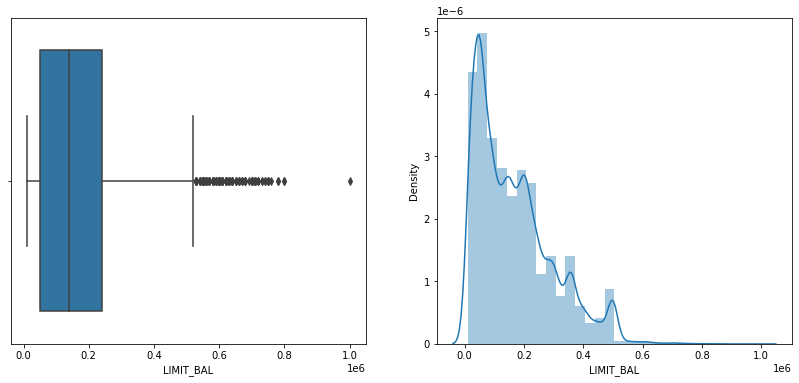

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64
The upper and lower bounds for suspected outliers are 525000.0 and -235000.0


In [ ]:
# finding the outliers
### limit_bal
print('Visulaize Limit_bal Feature')
visualize_num_feature(df.LIMIT_BAL)
stat_summary(df.LIMIT_BAL)

Visulaize BILL_AMT1 Feature


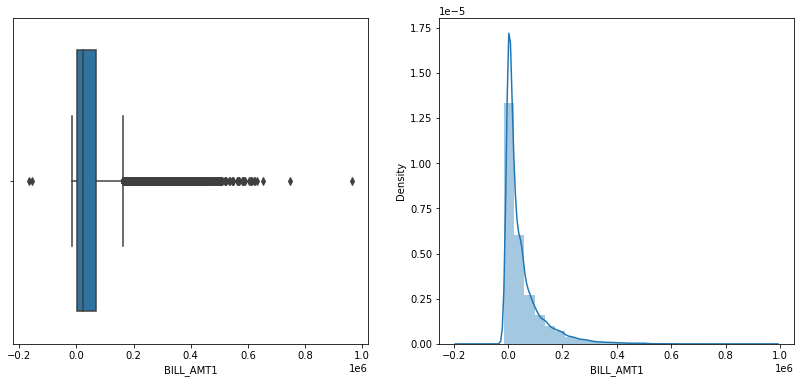

count     30000.000000
mean      51223.330900
std       73635.860576
min     -165580.000000
25%        3558.750000
50%       22381.500000
75%       67091.000000
max      964511.000000
Name: BILL_AMT1, dtype: float64
The upper and lower bounds for suspected outliers are 162389.375 and -91739.625


In [ ]:
# finding the outliers
### BILL_AMT1
print('Visulaize BILL_AMT1 Feature')
visualize_num_feature(df.BILL_AMT1)
stat_summary(df.BILL_AMT1)

Visulaize BILL_AMT2 Feature


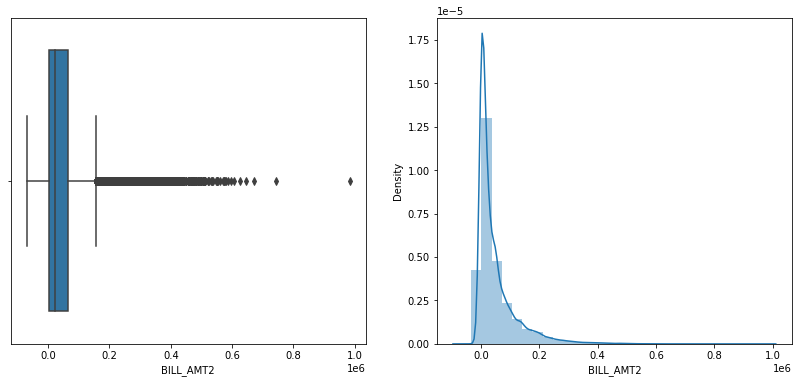

count     30000.000000
mean      49179.075167
std       71173.768783
min      -69777.000000
25%        2984.750000
50%       21200.000000
75%       64006.250000
max      983931.000000
Name: BILL_AMT2, dtype: float64
The upper and lower bounds for suspected outliers are 155538.5 and -88547.5


In [ ]:
# finding the outliers
### BILL_AMT2
print('Visulaize BILL_AMT2 Feature')
visualize_num_feature(df.BILL_AMT2)
stat_summary(df.BILL_AMT2)

####Form the graph and the values we can conclude that the data is highly imbalance.

In [ ]:
# Numerical Values of Defaulters
df['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

In [ ]:
# Gender (1 = male; 2 = female).
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [ ]:
# In ['GENDER'] column in the dataset the gender was presenting in 1 or 2 value for male / female so we are changing it to be 0 and 1
# Sex  0 for male ; 1 for female

df['SEX'] =  [ 0 if x==1 else 1 for x in df['SEX']]
df['SEX'].value_counts()

1    18112
0    11888
Name: SEX, dtype: int64

In [ ]:
#first look
df.head(15)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,1,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,1,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,1,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,1,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,0,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,0,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,500000,0,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,100000,1,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
9,140000,1,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0


In [ ]:
#Unique value in "EDUCATION" column
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

**Descriptive Statistics**

The table below shows the descriptive statistics of the variables of this dataset.

In [ ]:
set_option('display.width', 150)
set_option('precision', 2)

print("SUMMARY STATISTICS OF NUMERIC COLUMNS")
print()
print(df.describe().T)

SUMMARY STATISTICS OF NUMERIC COLUMNS

                              count       mean        std       min       25%       50%        75%       max
LIMIT_BAL                   30000.0  167484.32  129747.66   10000.0  50000.00  140000.0  240000.00  1.00e+06
SEX                         30000.0       1.60       0.49       1.0      1.00       2.0       2.00  2.00e+00
EDUCATION                   30000.0       1.85       0.79       0.0      1.00       2.0       2.00  6.00e+00
MARRIAGE                    30000.0       1.55       0.52       0.0      1.00       2.0       2.00  3.00e+00
AGE                         30000.0      35.49       9.22      21.0     28.00      34.0      41.00  7.90e+01
PAY_1                       30000.0      -0.02       1.12      -2.0     -1.00       0.0       0.00  8.00e+00
PAY_2                       30000.0      -0.13       1.20      -2.0     -1.00       0.0       0.00  8.00e+00
PAY_3                       30000.0      -0.17       1.20      -2.0     -1.00       0.0  

##**Step 2: Data Visualisation and Analysis [Exploratory Data Analysis (EDA)]**

**Mapping the target: categorizing**

From this sample of 30,000 credit card holders, there were 6,636 default credit cards; that is, the proportion of default in the data is 22.1%.

In [ ]:
# defining the function which help in calcultion of percentage 
def calculate_percentage (default_count, total_count, label):
    print(("Percentage of {} is {} %").format(label, math.modf((total_count * 100) / default_count)))


#### Trying to find out the basic analogy behind the default by plotting different graph.


In [ ]:
# Arranging or filtering the values for proper visualization
# [1 = graduate school; 2 = university; 3 = high school; 4 = others]
# preparing the vairable for the diagram
EDUCATION_RANGE= [1,2,3,4]
school= df['EDUCATION'][df['EDUCATION']==1].count()
school_default = df['EDUCATION'][(df['EDUCATION']==1)&(df['default payment next month'])].count()

university= df['EDUCATION'][df['EDUCATION']==2].count()
university_default = df['EDUCATION'][(df['EDUCATION']==2)&(df['default payment next month'])].count()

high_school= df['EDUCATION'][df['EDUCATION']==3].count()
high_school_default = df['EDUCATION'][(df['EDUCATION']==3)&(df['default payment next month'])].count()

others= df['EDUCATION'][df['EDUCATION']==4].count()
others_default = df['EDUCATION'][(df['EDUCATION']==4)&(df['default payment next month'])].count()

education_total = [school,university,high_school,others]
default_education_total=  [school_default,university_default,high_school_default,others_default] 


**Frequency of explanatory variables by defaulted and non-defaulted cards**

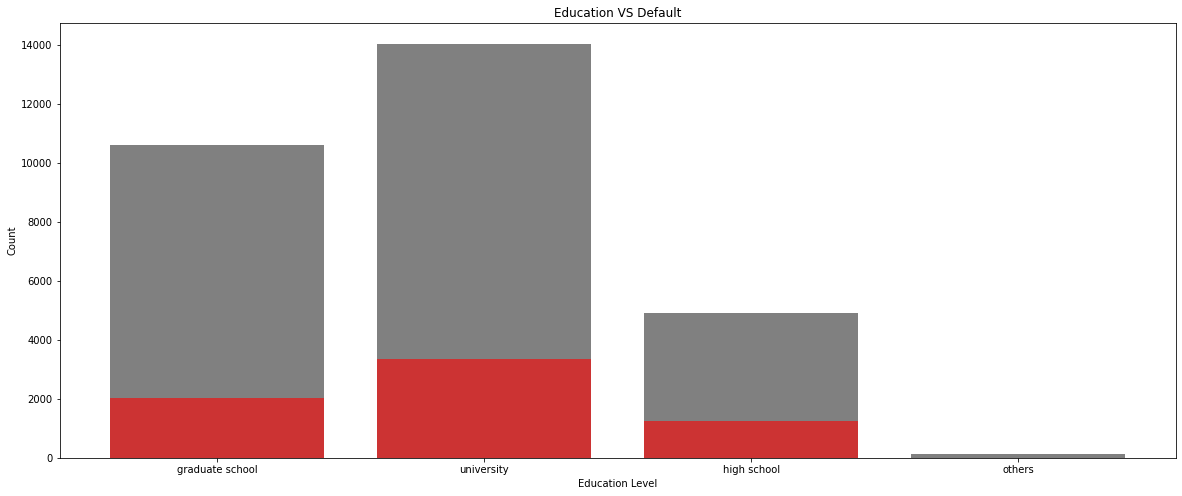

Percentage of Graduate School Default is (0.23476617855455828, 19.0) %
Percentage of University Default is (0.7348538845331447, 23.0) %
Percentage of High school Default is (0.15761643278421644, 25.0) %
Percentage of Others Default is (0.691056910569106, 5.0) %


In [ ]:
# plotting bar graph between education level and the default
plt.figure(figsize=(20,8))
plt.bar(EDUCATION_RANGE , education_total,color='grey',alpha = 1)
plt.bar(EDUCATION_RANGE , default_education_total,color='red', alpha = 0.6)
plt.xticks(EDUCATION_RANGE,['graduate school','university','high school','others'])
plt.title("Education VS Default")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.show()

calculate_percentage(school,school_default,"Graduate School Default")
calculate_percentage(university,university_default,"University Default")
calculate_percentage(high_school,high_school_default,"High school Default")
calculate_percentage(others,others_default,"Others Default")



####**Conclusion**
We can easly interpret from the above graph that most of the default section is university in education level followed by graduate schools.

In [ ]:
# Arranging or filtering the values for proper visualization
# male = 0 , female = 1
# preparing the vairable for the diagram

GENDER_RANGE= [0,1]

male= df['SEX'][df['SEX']==0].count()
male_default = df['SEX'][(df['SEX']==0)&(df['default payment next month']==1)].count()

female=df['SEX'][df['SEX']==1].count()
female_default = df['SEX'][(df['SEX']==1)&(df['default payment next month']==1)].count()

gender_total = [male,female]
default_gender_total = [male_default,female_default]




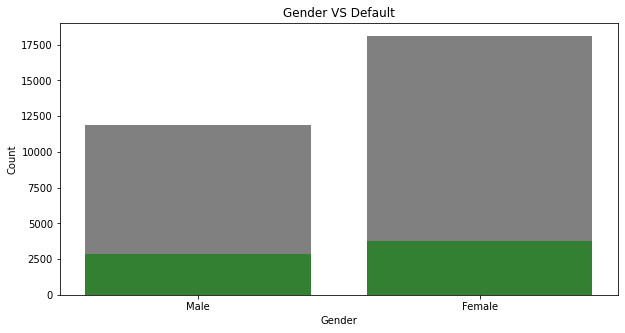

Percentage of Male Default is (0.16722745625841284, 24.0) %
Percentage of Female Default is (0.7762809187279167, 20.0) %


In [ ]:
## Plotting the bar plot between the gender and the default
plt.figure(figsize=(10,5))
plt.bar(GENDER_RANGE,gender_total, color='grey')
plt.bar(GENDER_RANGE,default_gender_total, color='green',alpha = 0.6)
plt.xticks([0,1],['Male','Female'])
plt.title("Gender VS Default")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

calculate_percentage(male,male_default,"Male Default")
calculate_percentage(female,female_default,"Female Default")

#####**Conclusion**
From the above graph we can conclude that among the gender secenario Female are more default but we cannot strongly say that because the difference is very minor between male and female.

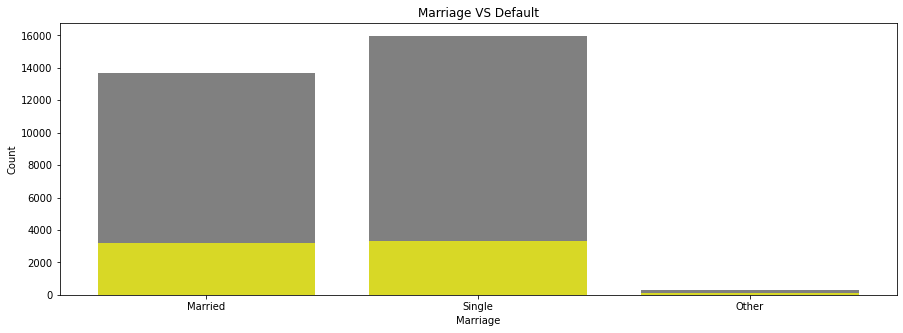

Percentage of Married Default is (0.47170363862654696, 23.0) %
Percentage of Single Default is (0.9283387622149846, 20.0) %
Percentage of Others Default is (0.00619195046439458, 26.0) %


In [ ]:
# Arranging or filtering the values for proper visualization
# 1=married, 2=single, 3=others
# preparing the vairable for the diagram

MARRIAGE_RANGE= [1,2,3]


married= df['MARRIAGE'][df['MARRIAGE']==1].count()
married_default = df['MARRIAGE'][(df['MARRIAGE']==1)&(df['default payment next month']==1)].count()

single=df['MARRIAGE'][df['MARRIAGE']==2].count()
single_default = df['MARRIAGE'][(df['MARRIAGE']==2)&(df['default payment next month']==1)].count()

others=df['MARRIAGE'][df['MARRIAGE']==3].count()
others_default = df['MARRIAGE'][(df['MARRIAGE']==3)&(df['default payment next month']==1)].count()


marriage_total = [married,single,others]
default_marriage_total = [married_default,single_default,others_default]

# plotting bar plot between marriage and default 
plt.figure(figsize=(15,5))
plt.bar(MARRIAGE_RANGE,marriage_total, color='grey')
plt.bar(MARRIAGE_RANGE,default_marriage_total, color='yellow',alpha = 0.7)
plt.xticks([1,2,3],['Married','Single','Other'])
plt.title("Marriage VS Default")
plt.xlabel('Marriage')
plt.ylabel('Count')
plt.show()

calculate_percentage(married,married_default,"Married Default")
calculate_percentage(single,single_default,"Single Default")
calculate_percentage(others,others_default,"Others Default")


####**Conclusion**
From the Above Bar plot we can clearly see that the married(Couple) and the singles both shows the same default result so we cannot say anything regarding marriage and singles.

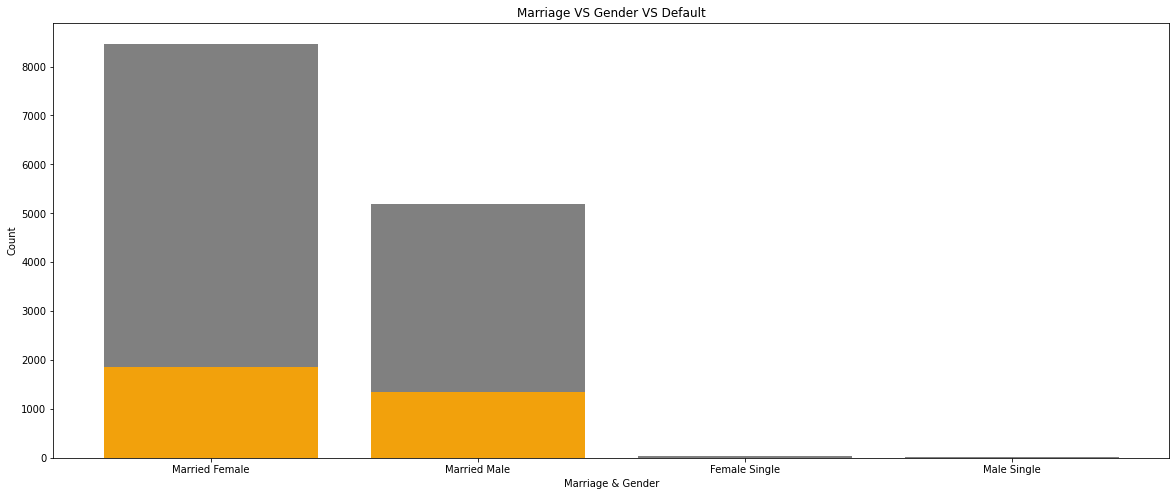

Percentage of Married Female Default is (0.9624512929507603, 21.0) %
Percentage of Married Male Default is (0.9344894026974941, 25.0) %
Percentage of Single Female Default is (0.5, 7.0) %
Percentage of Single Male Default is (0.2857142857142865, 14.0) %


In [ ]:
# Arranging or filtering the values for proper visualization
# 1=married, 2=single, 3=others
# preparing the vairable for the diagram

MARRIAGE_RANGE= [1,2,3,4]

female_married= df['MARRIAGE'][(df['MARRIAGE']==1)&(df['SEX']==1)].count()
female_married_default = df['MARRIAGE'][(df['MARRIAGE']==1)&(df['default payment next month']==1)&(df['SEX']==1)].count()

male_married= df['MARRIAGE'][(df['MARRIAGE']==1)&(df['SEX']==0)].count()
male_married_default = df['MARRIAGE'][(df['MARRIAGE']==1)&(df['default payment next month']==1)&(df['SEX']==0)].count()

female_single= df['MARRIAGE'][(df['MARRIAGE']==0)&(df['SEX']==1)].count()
female_single_default = df['MARRIAGE'][(df['MARRIAGE']==0)&(df['default payment next month']==1)&(df['SEX']==1)].count()

male_single= df['MARRIAGE'][(df['MARRIAGE']==0)&(df['SEX']==0)].count()
male_single_default = df['MARRIAGE'][(df['MARRIAGE']==0)&(df['default payment next month']==1)&(df['SEX']==0)].count()


marriage_gender_total = [female_married,male_married,female_single,male_single]
default_marriage_gender_total = [female_married_default,male_married_default,female_single_default,male_single_default]

# plotting the bar plot between the Marriage(Gender) and Default
plt.figure(figsize=(20,8))
plt.bar(MARRIAGE_RANGE,marriage_gender_total, color='grey')
plt.bar(MARRIAGE_RANGE,default_marriage_gender_total, color='Orange',alpha = 0.9)
plt.xticks(MARRIAGE_RANGE,['Married Female','Married Male','Female Single', 'Male Single'])
plt.title("Marriage VS Gender VS Default")
plt.xlabel('Marriage & Gender')
plt.ylabel('Count')
plt.show()

calculate_percentage(female_married,female_married_default,"Married Female Default")
calculate_percentage(male_married,male_married_default,"Married Male Default")
calculate_percentage(female_single,female_single_default,"Single Female Default")
calculate_percentage(male_single,male_single_default,"Single Male Default")

####**Conclusion**
From the above graph we can interpret that Married Female are more default then the married male.

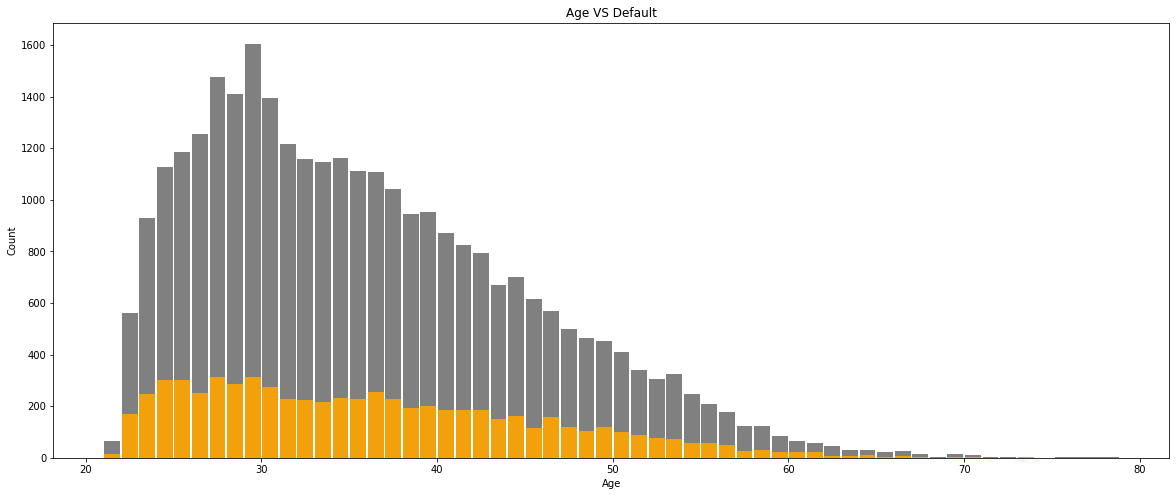

Percentage of 21 is (0.8955223880597032, 20.0) %
Percentage of 22 is (0.17857142857142705, 30.0) %
Percentage of 23 is (0.5306122448979593, 26.0) %
Percentage of 24 is (0.6193433895297247, 26.0) %
Percentage of 25 is (0.46374367622259527, 25.0) %
Percentage of 26 is (0.14331210191082633, 20.0) %
Percentage of 27 is (0.19160460392687995, 21.0) %
Percentage of 28 is (0.2980837473385378, 20.0) %
Percentage of 29 is (0.5015576323987538, 19.0) %
Percentage of 30 is (0.6415770609319011, 19.0) %
Percentage of 31 is (0.8167625308134774, 18.0) %
Percentage of 32 is (0.4300518134715041, 19.0) %
Percentage of 33 is (0.7609075043630007, 18.0) %
Percentage of 34 is (0.8795180722891551, 19.0) %
Percentage of 35 is (0.30548068283917473, 20.0) %
Percentage of 36 is (0.9241877256317679, 22.0) %
Percentage of 37 is (0.9980787704130627, 21.0) %
Percentage of 38 is (0.5508474576271176, 20.0) %
Percentage of 39 is (0.8595387840670874, 20.0) %
Percentage of 40 is (0.49425287356321945, 21.0) %
Percentage of 

In [ ]:
## Plotting the bar plot between the Age and The Default
plt.figure(figsize=(20,8))
plt.title("Age VS Default")
plt.hist(df['AGE'], sorted(df['AGE'].unique()),rwidth=0.9, color ='grey')
plt.hist(df['AGE'][(df['default payment next month']==1)], sorted(df['AGE'].unique()),rwidth=0.9,color='orange',alpha = 0.9)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()



for x in sorted(df['AGE'].unique()):
    calculate_percentage(
                         df['AGE'][df['AGE']==x ].count(),df['AGE'][(df['AGE']==x )&(df['default payment next month']==1)].count(), x)

####**Conclusion**
From the above graph we can conclude that the most defalut Age group is range from 23 to 38.

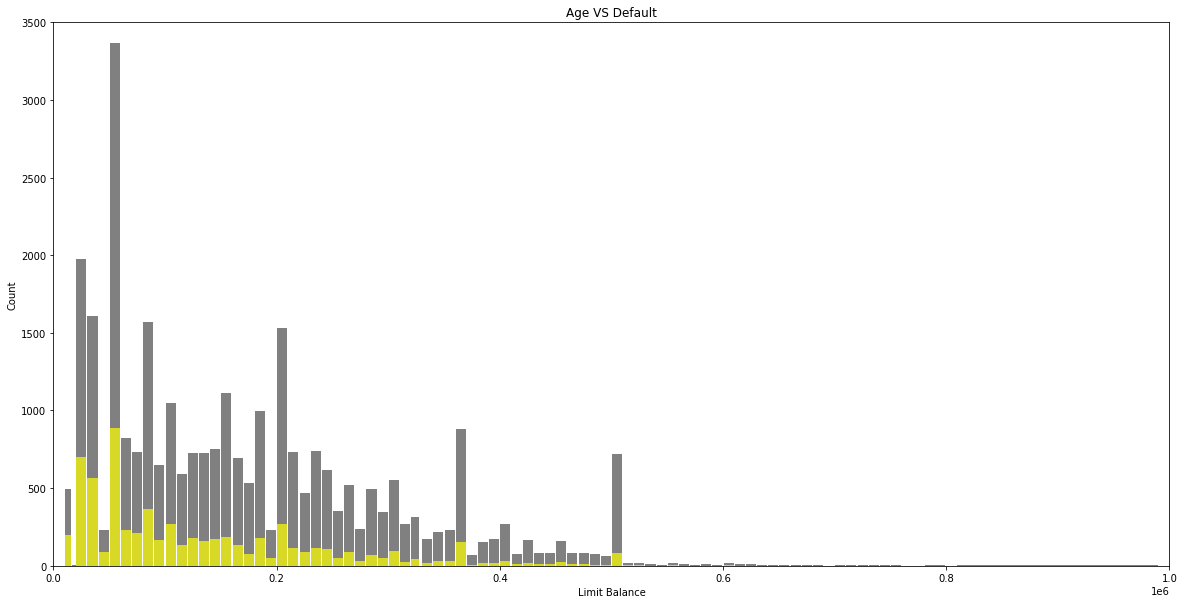

In [ ]:
# plotting the bar graph between the Limit amount and The Defaults 
#LIMIT_BAL
plt.figure(figsize=(20,10))
plt.hist(df['LIMIT_BAL'], sorted(df['LIMIT_BAL'].unique()),rwidth=0.9, color ='grey')
plt.hist(df['LIMIT_BAL'][(df['default payment next month']==1)], sorted(df['LIMIT_BAL'].unique()),rwidth=0.9,color='yellow',alpha = 0.7)
plt.xlabel('Limit Balance')
plt.ylabel('Count')
plt.title("Age VS Default")
plt.axis([0,1000000,0,3500])
plt.show()

####**Conclusion**
There are 30,000 credit card clients.

The average value for the amount of credit card limit is 167,484 NT dollars. The standard deviation is 129,747 NT dollars, ranging from 10,000 to 1M NT dollars.

Education level is mostly graduate school and university.

Most of the clients are either marrined or single (less frequent the other status).

Average age is 35.5 years, with a standard deviation of 9.2.

As the value 0 for default payment means 'not default' and value 1 means 'default', the mean of 0.221 means that there are 22.1% of credit card contracts that will default next month (will verify this in the next sections of this analysis).

In [ ]:
def getColumnsNames(prefix):
    return [prefix+str(x) for x in range(1,7)]

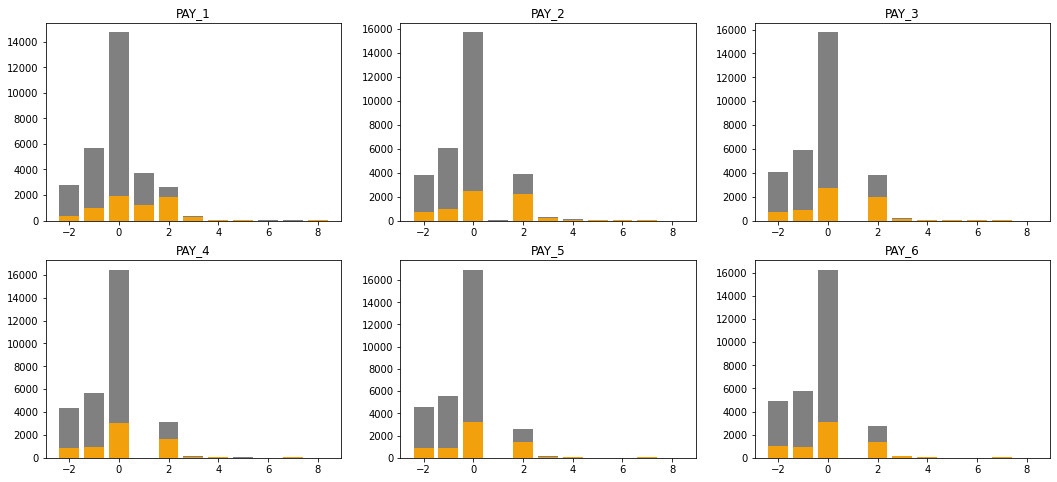

In [ ]:
# PAY_1 , PAY_2 , PAY_3 , PAY_4 , PAY_5, PAY_6
pay_status_columns = getColumnsNames('PAY_')
figure, ax = plt.subplots(2,3)
figure.set_size_inches(18,8)


for i in range(len(pay_status_columns)):
    row,col = int(i/3), i%3

    d  = df[pay_status_columns[i]].value_counts()
    x = df[pay_status_columns[i]][(df['default payment next month']==1)].value_counts()
    ax[row,col].bar(d.index, d, align='center', color='grey')
    ax[row,col].bar(x.index, x, align='center', color='orange', alpha=0.9)
    ax[row,col].set_title(pay_status_columns[i])
   


    
plt.show()

####**Conclusion**

It seems that PAY_0 (Repayment status in September) and PAY_2 (Repayment status in August) have more discriminatory power the repayment status in other months.

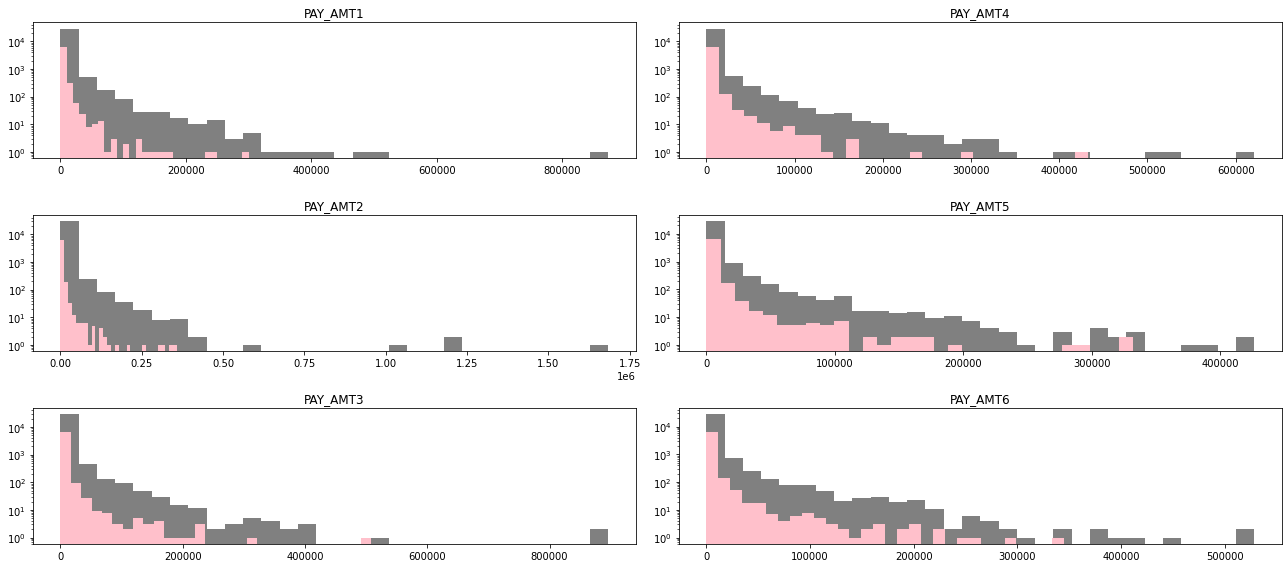

In [ ]:
# PAY_AMT1 ,PAY_AMT2, PAY_AMT3, PAY_AMT4, PAY_AMT5, PAY_AMT6
pay_amt_columns = getColumnsNames('PAY_AMT')
figure, ax = plt.subplots(3,2)
figure.set_size_inches(18,8)


for i in range(len(pay_amt_columns)):
    row,col =  i%3, int(i/3)
   
    ax[row,col].hist(df[pay_amt_columns[i]], 30, color ='grey')
    ax[row,col].hist(df[pay_amt_columns[i]][(df['default payment next month']==1)],30,color='pink')
    ax[row,col].set_title(pay_amt_columns[i])
    #adding scaling to make the graph more helpful
    ax[row,col].set_yscale('log', nonposy='clip')
plt.tight_layout()
plt.show()

#####The above histogram shows the distribution of payment amount for each month explicitly for defaulters and non-defaulters

Because the values inputted in the PAY columns are negative and positive, the sum of these values do not show enough information of the person's credit card payment patterns. We decided to create four other features to reflect how many times they didn't use their credit card, paid their bill in full, used their revolving credit, and how many total months they were late on payments.

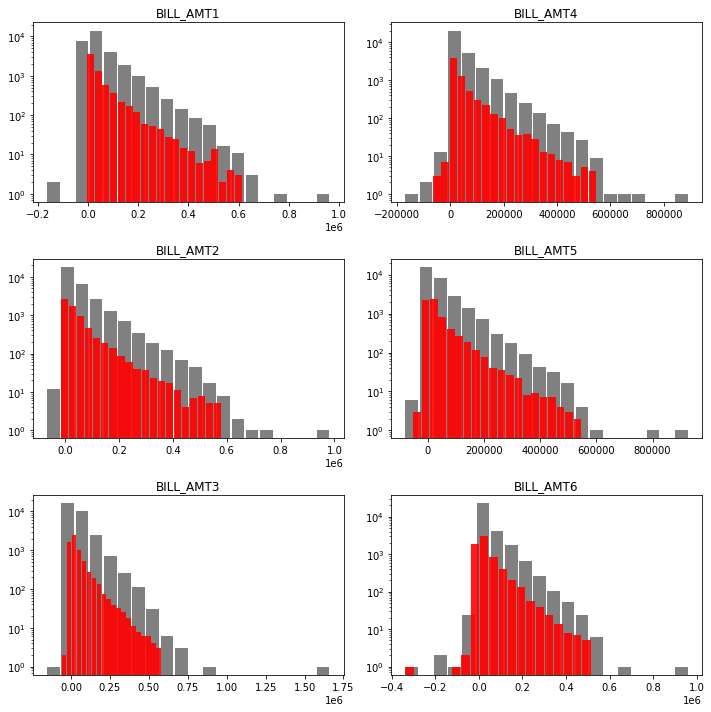

In [ ]:
# BILL_AMT1 , BILL_AMT2 , BILL_AMT3 , BILL_AMT4 , BILL_AMT5, BILL_AMT6
#(-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
bill_atm_columns =  getColumnsNames('BILL_AMT')
figure, ax = plt.subplots(3,2)
figure.set_size_inches(10,10)


for i in range(len(bill_atm_columns)):
    row,col =  i%3, int(i/3)
   
    ax[row,col].hist(df[bill_atm_columns[i]], 20,rwidth=0.9, color ='grey')
    ax[row,col].hist(df[bill_atm_columns[i]][(df['default payment next month']==1)],20,rwidth=0.9,color='red',alpha = 0.9)
    ax[row,col].set_title(bill_atm_columns[i])
    #adding scaling to make the graph more helpful
    ax[row,col].set_yscale('log', nonposy='clip')
plt.tight_layout()
plt.show()

#####The above histogram shows the distribution of Bill amount generated for each month explicitly for defaulters and non-defaulters

In [ ]:
correlation = df.corr()

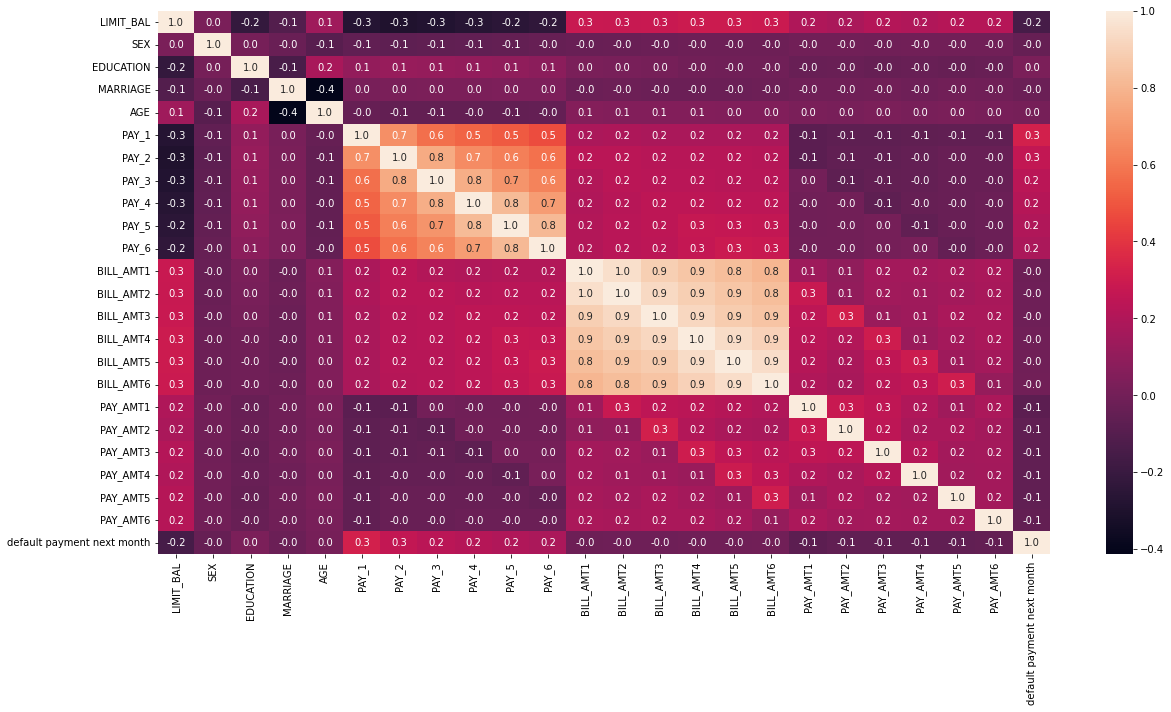

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap( correlation, annot=True, fmt=".1f" )  
plt.show()

####**Conclusion**
So it looks like the PAY_1, PAY_X variables are the strongest predictors of default, followed by the LIMIT_BAL and PAY_AMT_X variables.

**What do correlations mean?**

Lets separately fit correlated and uncorrelated data via linear regression:

Uncorrelated data are poentially more useful: discrimentory!


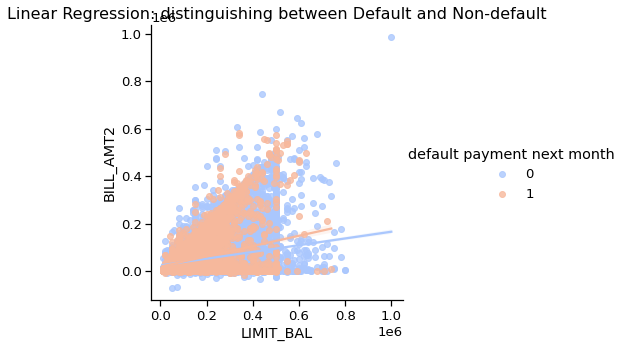

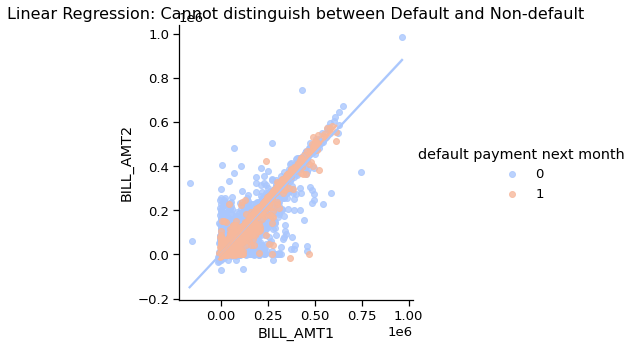

In [ ]:
sns.lmplot(x='LIMIT_BAL', y= 'BILL_AMT2', data = df, hue ='default payment next month', 
           palette='coolwarm')
plt.title('Linear Regression: distinguishing between Default and Non-default', size=16)


sns.lmplot(x='BILL_AMT1', y= 'BILL_AMT2', data = df, hue ='default payment next month', 
           palette='coolwarm')
plt.title('Linear Regression: Cannot distinguish between Default and Non-default', size=16);

print('Uncorrelated data are poentially more useful: discrimentory!')

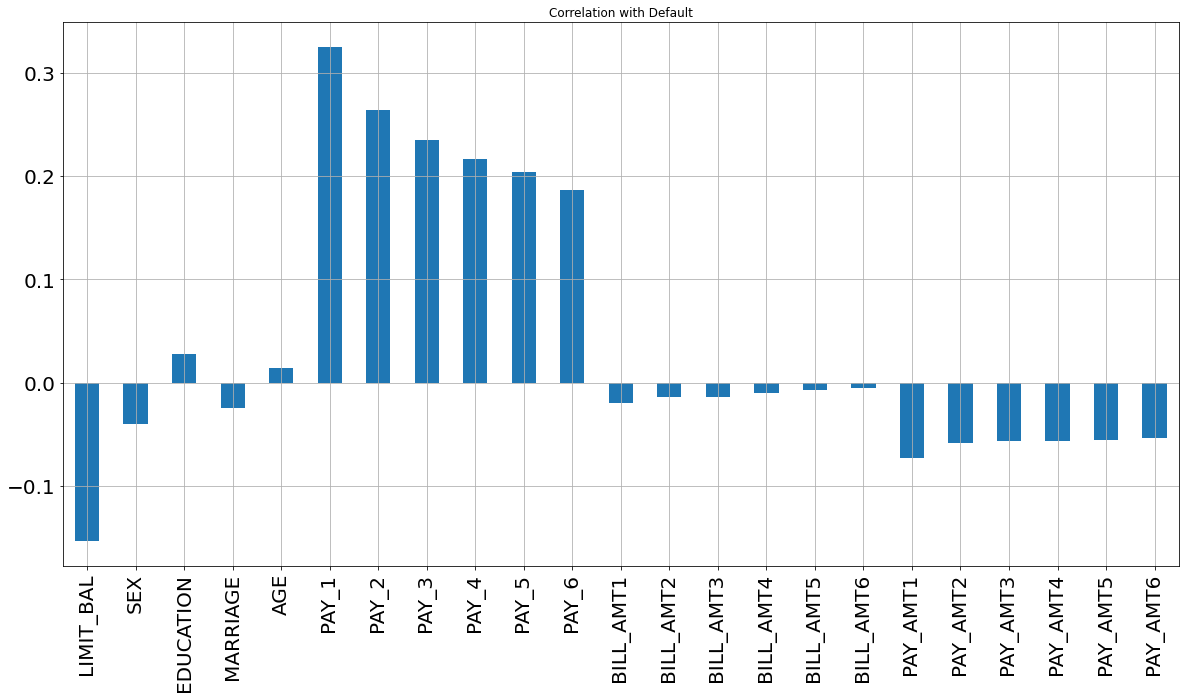

In [ ]:
X = df.drop(['default payment next month'],axis=1)
X.corrwith(df['default payment next month']).plot.bar(figsize = (20, 10), title = "Correlation with Default", 
                                        fontsize = 20,rot = 90, grid = True)
plt.show()

####**Conclusion**
It seems from the above graph is that most negatively correlated feature is LIMIT_BAL but we cannot blindly remove this feature because according to me it is very important feature for prediction. ID is unimportant and it has no role in prediction so we will remove it later.

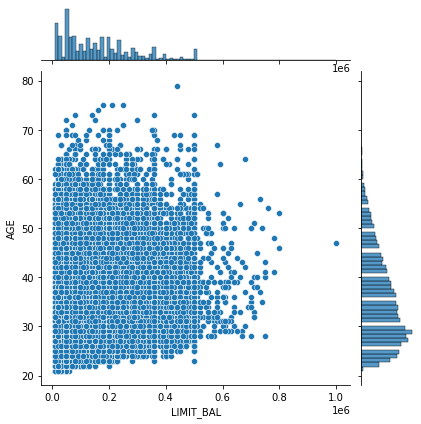

In [ ]:
sns.jointplot(x='LIMIT_BAL',y='AGE',data=df,kind="scatter")
plt.show()

###**Facet Grid**

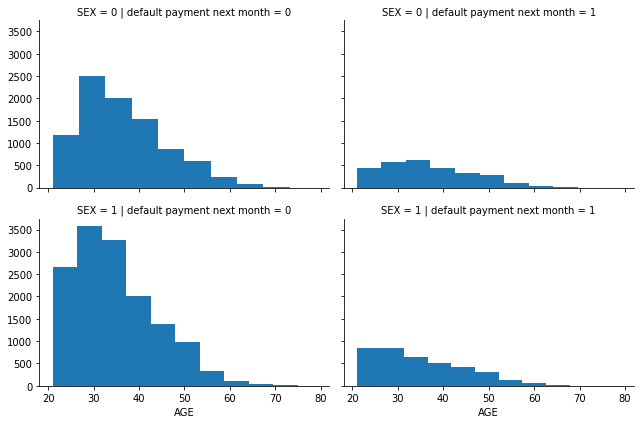

In [ ]:
from seaborn.palettes import color_palette
g = sns.FacetGrid(df, col = 'default payment next month', row = 'SEX', aspect=1.5,palette='husl')
g.map(plt.hist, 'AGE',)
plt.show()

####**Conclusion**
From the above FaceGrid Plot we can see that NonDefaults have a higher proportion of people 30-40years

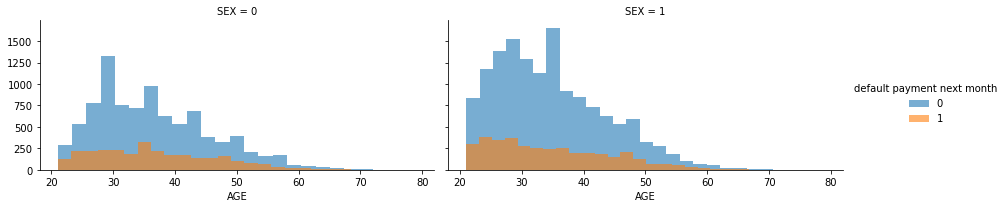

In [ ]:
h = sns.FacetGrid(df, col='SEX', hue='default payment next month', aspect=2, height=3)
h.map(plt.hist, 'AGE', alpha=0.6, bins=25) #alpha is for opacity
h.add_legend()
plt.show()

##**Step4: Data Cleaning**

#### Questions
EDUCATION has category 5 and 6 that are unlabelled, moreover the category 0 is undocumented.

MARRIAGE has a label 0 that is undocumented

Data Transformation

The 0 in MARRIAGE can be safely categorized as 'Other' (thus 3).

The 0 (undocumented), 5 and 6 (label unknown) in EDUCATION can also be put in a 'Other' cathegory (thus 4)

Thus is a good occasion to learn how to use the .loc function

In [ ]:
fil = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)
df.loc[fil, 'EDUCATION'] = 4
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [ ]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [ ]:
df['PAY_2'].value_counts()

 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64

In [ ]:
df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3
df.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

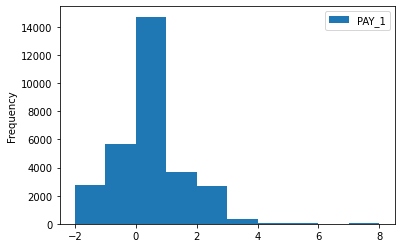

In [ ]:
df.plot(y = 'PAY_1',kind='hist')
plt.legend()
plt.show()

In [ ]:
fil = (df.PAY_1 == -1) | (df.PAY_1==-2)
df.loc[fil,'PAY_1']=0
df.PAY_1.value_counts()
fil = (df.PAY_2 == -1) | (df.PAY_2==-2)
df.loc[fil,'PAY_2']=0
df.PAY_2.value_counts()
fil = (df.PAY_3 == -1) | (df.PAY_3==-2)
df.loc[fil,'PAY_3']=0
df.PAY_3.value_counts()
fil = (df.PAY_4 == -1) | (df.PAY_4==-2)
df.loc[fil,'PAY_4']=0
df.PAY_4.value_counts()
fil = (df.PAY_5 == -1) | (df.PAY_5==-2)
df.loc[fil,'PAY_5']=0
df.PAY_5.value_counts()
fil = (df.PAY_6 == -1) | (df.PAY_6==-2)
df.loc[fil,'PAY_6']=0
df.PAY_6.value_counts()

0    26921
2     2766
3      184
4       49
7       46
6       19
5       13
8        2
Name: PAY_6, dtype: int64

In [ ]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,1,2,1,24,2,2,0,0,0,...,0,0,0,0,689,0,0,0,0,1
2,120000,1,2,2,26,0,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,1,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,1,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,0,2,1,57,0,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_1                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [ ]:
df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [ ]:
df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


##**One Hot encoding for categorical variable**

In [ ]:
# categorical_vars = ['SEX','EDUCATION','MARRIAGE','PAY_1','PAY_2','PAY_3','PAY_4',
#                    'PAY_5','PAY_6']
# #dataset[categorical_vars] = dataset[categorical_vars].astype(str)
# df = pd.get_dummies(df,columns=categorical_vars,drop_first=True)
# df.head()

In [ ]:
df.shape

(30000, 24)

In [ ]:
df.columns = df.columns.map(str.lower)

In [ ]:
df.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'default payment next month'],
      dtype='object')

In [ ]:
df.head()

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,1,2,1,24,2,2,0,0,0,...,0,0,0,0,689,0,0,0,0,1
2,120000,1,2,2,26,0,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,1,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,1,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,0,2,1,57,0,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


##**Step5: Feature Scaling of Numerical Attributes**

**Standardization** of data was performed; i.e, all features are centered around zero and have variance one.

In [ ]:
col_to_norm = ['limit_bal', 'age', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4',
       'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3',
       'pay_amt4', 'pay_amt5', 'pay_amt6']
df[col_to_norm] = df[col_to_norm].apply(lambda x : (x-np.mean(x))/np.std(x))

In [ ]:
df.head()

,limit_bal,sex,education,marriage,age,pay_1,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,-1.136720,1,2,1,-1.246020,2,2,0,0,0,...,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,1
2,-0.365981,1,2,2,-1.029047,0,2,0,0,0,...,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,1
3,-0.597202,1,2,2,-0.161156,0,0,0,0,0,...,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,0
4,-0.905498,1,2,1,0.164303,0,0,0,0,0,...,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,0
5,-0.905498,0,2,1,2.334029,0,0,0,0,0,...,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,0


In [ ]:
df.columns

Index(['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_1', 'pay_2',
       'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2',
       'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6',
       'default payment next month'],
      dtype='object')

###**Machine Learning: Classification models**
The classification models used for this analysis are: Logistic Regression, Decision Tree and Random Forest Classifier.

To build machine learning models the original data was divided into features (X) and target (y) and then split into train (80%) and test (20%) sets. Thus, the algorithms would be trained on one set of data and tested out on a completely different set of data (not seen before by the algorithm).

##**Step6: Spiliting Dataset into training(80%) and test set(20%)**

In [ ]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [ ]:
#from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 1)

####**Synthetic Minority Oversampling Technique (SMOTE)**
This technique generates synthetic data for the minority class.

SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

In [ ]:
from collections import Counter
# import library
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 23364, 1: 6636})
Resample dataset shape Counter({1: 23364, 0: 23364})


In [ ]:
X_train.shape

(24000, 23)

In [ ]:
X_test.shape

(6000, 23)

In [ ]:
y_train.shape

(24000,)

##**Step7: Applying Machine Learning Algorithm for Classification Problem**
**Logistic Regression**

In Logistic Regression, we wish to model a dependent variable(Y) in terms of one or more independent variables(X). It is a method for classification. This algorithm is used for the dependent variable that is Categorical. Y is modeled using a function that gives output between 0 and 1 for all values of X. In Logistic Regression, the Sigmoid (aka Logistic) Function is used

In [ ]:
logmodel = LogisticRegression(random_state=1)
logmodel.fit(X_train,y_train)

LogisticRegression(random_state=1)

In [ ]:
y_pred = logmodel.predict(X_test)

In [ ]:
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.814167,0.678457,0.315632,0.430832,0.636371


###**Stochastic Gradient Descent**
Stochastic Gradient Descent (SGD) is a simple yet very efficient approach to discriminative learning of linear classifiers under convex loss functions such as (linear) Support Vector Machines and Logistic Regression.It is on of the Gradient Descent Algorithm.It uses only a single example (a batch size of 1) per iteration. Given enough iterations, SGD works but is very noisy. The term "stochastic" indicates that the one example comprising each batch is chosen at random.

In [ ]:
sgd = SGDClassifier(loss='log', penalty='l1', learning_rate='optimal',random_state=1)
sgd.fit(X_train, y_train)

SGDClassifier(loss='log', penalty='l1', random_state=1)

In [ ]:
y_pred = sgd.predict(X_test)
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model = pd.DataFrame([['Stochastic Gradient Descent', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Stochastic Gradient Descent,0.814167,0.683168,0.309648,0.426145,0.634237


###**K-Nearest Neighbour**
KNN can be used for both classification and regression predictive problems. However, it is more widely used in classification problems in the industry.

KNN focuses on easy implementation and good performance at the cost of computational time, but in our case the size of the dataset is considerably small so we can apply KNN.

We can implement a KNN model by following the below steps:

Load the data
Initialise the value of k
For getting the predicted class, iterate from 1 to total number of training data points
Calculate the distance between test data and each row of training data. Here we will use Euclidean distance as our distance metric since it’s the most popular method. The other metrics that can be used are Chebyshev, cosine, etc.
Sort the calculated distances in ascending order based on distance values
Get top k rows from the sorted array
Get the most frequent class of these rows
Return the predicted class
Let's go ahead and use the elbow method to pick a good K Value!

**Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list. Refer to the lecture if you are confused on this step.**

In [ ]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

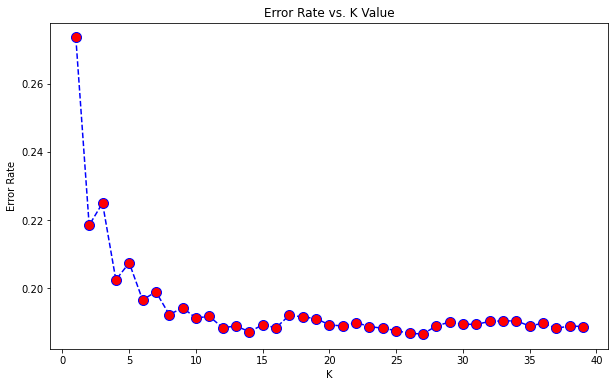

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=17)

In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

res = pd.DataFrame([['K-Nearest Neighbour', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
res

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,K-Nearest Neighbour,0.807833,0.629577,0.334331,0.436737,0.638965


###**Support Vector Machine**
SVM or Support Vector Machine is a linear model for classification and regression problems. It can solve linear and non-linear problems.The algorithm creates a line or a hyperplane which separates the data into classes using different kernel tricks like = 'linear','rbf' (gaussian).

Thus SVM tries to make a decision boundary in such a way that the separation between the two classes(that street) is as wide as possible.

In [ ]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
scv = SVC(kernel = 'rbf', random_state = 0)
scv.fit(X_train, y_train)

SVC(random_state=0)

In [ ]:
# Predicting the Test set results
y_pred = scv.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

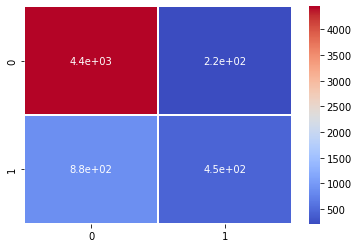

In [ ]:
sns.heatmap(cm,annot= True,linewidths=1,cmap='coolwarm')
plt.show()

In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model = pd.DataFrame([['Support Vector Machine', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Support Vector Machine,0.816667,0.677661,0.33807,0.451098,0.645981


###**Gaussian Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred =naive_bayes.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm


array([[3882,  781],
       [ 601,  736]])

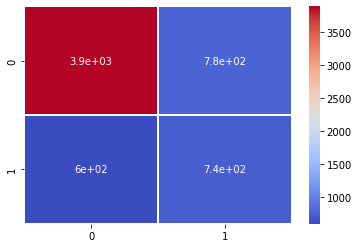

In [ ]:
sns.heatmap(cm,annot= True,linewidths=1,cmap='coolwarm')
plt.show()

In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model= pd.DataFrame([['Gaussian Naive Bayes', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Gaussian Naive Bayes,0.769667,0.485168,0.550486,0.515767,0.691499


###**Decision Tree Classification**
The idea of a decision tree is to divide the data set into smaller data sets based on the descriptive features until you reach a small enough set that contains data points that fall under one label.

**Advantages of Decision Trees**
Decision trees are easy to interpret. To build a decision tree requires little data preparation from the user- there is no need to normalize data

**Disadvantages of Decision Trees**
Decision trees are likely to overfit noisy data. The probability of overfitting on noise increases as a tree gets deeper

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)

In [ ]:
dct.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = dct.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[3840,  823],
       [ 830,  507]])

In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model = pd.DataFrame([['Decision Tree Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Decision Tree Classifier,0.7245,0.381203,0.379207,0.380202,0.601356


###**Random Forest Classification**
Random Forest is a supervised learning algorithm, it creates a forest and makes it somehow random. The "forest“ it builds, is an ensemble of Decision Trees.

**Step1**:- Pick at random K data points from the training set

**Step2**:- Build the Decision tree associated to these K data points

**Step3**:- Choose the Number of trees(n) you want to build and repeat **STEP1** and **STEP2**

**Step4**:- For a new data points make each one of your 'n' trees predict the category to which the data point belongs and assign the new data point to the category that wins the majority vote

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100,criterion = 'entropy',random_state = 0)

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = rfc.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[4424,  239],
       [ 870,  467]])

In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Random tree Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])

results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Random tree Classifier,0.815167,0.661473,0.349289,0.457171,0.649017


###**XGBOOST classifier**
It is Gradient Boosting Algorithm

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier()

In [ ]:
y_pred =xgb.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[4448,  215],
       [ 867,  470]])

In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['XGBOOST Classifier', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,XGBOOST Classifier,0.819667,0.686131,0.351533,0.464886,0.652713


##**Step8: Model Optimization using Grid Search and K-Fold Cross validation**
There is a better way that I know to get your parameters right, which is to use GridSearchCV. Essentially we give a parameters space and test our model on every point of this space, returning the ideal combination of parameters.

In [ ]:
from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,roc_curve,auc

###**1)Grid Search on Logistic Regression Model**

In [ ]:
logmodel_params = {'C': [0.001, 0.01, 0.1, 1, 10], 'class_weight': [None, 'balanced'], 'penalty': ['l1', 'l2']}

In [ ]:
grid_search_log = GridSearchCV(estimator=logmodel,param_grid=logmodel_params,scoring='accuracy',cv=10,n_jobs=-1)

In [ ]:
grid_search_log = grid_search_log.fit(X_train,y_train)

In [ ]:
best_accuracy = grid_search_log.best_score_

In [ ]:
print('Accuracy on Cross Validation set :',best_accuracy)

Accuracy on Cross Validation set : 0.8184166666666666


In [ ]:
best_parameters = grid_search_log.best_params_
best_parameters

{'C': 10, 'class_weight': None, 'penalty': 'l2'}

In [ ]:
y_pred_log = grid_search_log.predict(X_test)

In [ ]:
roc=roc_auc_score(y_test, y_pred_log)
acc = accuracy_score(y_test, y_pred_log)
prec = precision_score(y_test, y_pred_log)
rec = recall_score(y_test, y_pred_log)
f1 = f1_score(y_test, y_pred_log)

In [ ]:
model_results =  pd.DataFrame([['Logistic Regression Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.814,0.677939,0.314884,0.430031,0.635997


###**2)Grid Search on Stochastic Gradient Descent**

In [ ]:
sgd_params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0, 5.0], 'class_weight': [None, 'balanced']}
grid_search_sgd = GridSearchCV(estimator=sgd,param_grid=sgd_params,scoring='accuracy',cv=5,n_jobs=-1)
grid_search_sgd = grid_search_sgd.fit(X_train,y_train)

In [ ]:
best_accuracy_1 = grid_search_sgd.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)

Accuracy on Cross Validation set : 0.8165833333333333


In [ ]:
y_pred_sgd = grid_search_sgd.predict(X_test)

In [ ]:
sgd_prob = grid_search_sgd.predict_proba(X_test)

In [ ]:
roc=roc_auc_score(y_test, y_pred_sgd)
acc = accuracy_score(y_test, y_pred_sgd)
prec = precision_score(y_test, y_pred_sgd)
rec = recall_score(y_test, y_pred_sgd)
f1 = f1_score(y_test, y_pred_sgd)
model =  pd.DataFrame([['Stochastic Gradient Descent Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results.append(model, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.8140,0.677939,0.314884,0.430031,0.635997
1,Stochastic Gradient Descent Tuned,0.8195,0.674931,0.366492,0.475036,0.657940


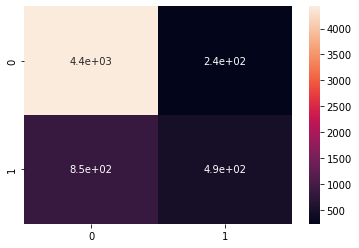

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_sgd)
sns.heatmap(cm,annot=True)
plt.show()

###**3)Grid Search on SVM model**

In [ ]:
scv_params = [{'C':[0.001,0.01,0.1,1,10,1000],'kernel':['linear']},
               {'C':[0.001,0.01,0.1,1,10,1000],'kernel':['rbf'],'gamma':[0.5,0.1,0.01,0.0001]}]

In [ ]:
grid_search_1 = GridSearchCV(estimator=scv,param_grid=scv_params,scoring='accuracy',cv=5,n_jobs=-1)
grid_search_1 = grid_search_1.fit(X_train,y_train)

In [ ]:
best_accuracy_1 = grid_search_1.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)

Accuracy on Cross Validation set : 0.8104166666666666


In [ ]:
best_parameters = grid_search_1.best_params_
best_parameters

{'C': 0.01, 'kernel': 'linear'}

In [ ]:
y_pred_scv =grid_search_1.predict(X_test)

In [ ]:
roc=roc_auc_score(y_test, y_pred_scv)
acc = accuracy_score(y_test, y_pred_scv)
prec = precision_score(y_test, y_pred_scv)
rec = recall_score(y_test, y_pred_scv)
f1 = f1_score(y_test, y_pred_scv)
model =  pd.DataFrame([['SVC MODEL TUNED', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results.append(model, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.814000,0.677939,0.314884,0.430031,0.635997
1,Stochastic Gradient Descent Tuned,0.819500,0.674931,0.366492,0.475036,0.657940
2,SVC MODEL TUNED,0.810333,0.605069,0.428571,0.501751,0.674183


###**4)Grid Search on KNN Classifier**
We will be using the optimsed-for-performance implemented function of KNN provided by the scikit-learn package. We will also loop over k=1 to 30 and observe the recall in all these cases to find the best suitable value of K for our problem.

In [ ]:
k_range = [n for n in range(1,30)]
leaf_size = [i for i in range(1,10)]
weight_options = ['uniform', 'distance']
knn_param = {'n_neighbors': k_range, 'leaf_size': leaf_size, 'weights': weight_options}

In [ ]:
grid_search = GridSearchCV(estimator = knn,param_grid = knn_param,scoring='accuracy',cv=5,n_jobs=-1)
grid_search = grid_search.fit(X_train,y_train)

In [ ]:
best_accuracy_1 = grid_search.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)

Accuracy on Cross Validation set : 0.8142083333333334


In [ ]:
best_parameters = grid_search.best_params_
best_parameters

{'leaf_size': 1, 'n_neighbors': 27, 'weights': 'distance'}

In [ ]:
y_pred_KNN = grid_search.predict(X_test)

In [ ]:
roc=roc_auc_score(y_test, y_pred_KNN)
acc = accuracy_score(y_test, y_pred_KNN)
prec = precision_score(y_test, y_pred_KNN)
rec = recall_score(y_test, y_pred_KNN)
f1 = f1_score(y_test, y_pred_KNN)
model =  pd.DataFrame([['KNN Model Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results.append(model, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.814000,0.677939,0.314884,0.430031,0.635997
1,Stochastic Gradient Descent Tuned,0.819500,0.674931,0.366492,0.475036,0.657940
2,SVC MODEL TUNED,0.810333,0.605069,0.428571,0.501751,0.674183
3,KNN Model Tuned,0.811000,0.646889,0.334331,0.440828,0.641002


###**5)Grid Search on Decision Tree**

In [ ]:
#dct_param_grid = {'splitter':['best','random'],'criterion': ['entropy', 'gini'],'class_weight' : ['balanced',None]}
parameters = {'max_depth':[2,4,6,8,10],'min_samples_leaf':[2,4,6,8,10], 'min_samples_split':[2,4,6,8,10]}
grid_search_dt = GridSearchCV(estimator=dct,param_grid=parameters,scoring = 'accuracy',cv=5,n_jobs=-1)
grid_search_dt = grid_search_dt.fit(X_train,y_train)

In [ ]:
best_accuracy_1 = grid_search_dt.best_score_

In [ ]:
print('Accuracy on Cross Validation set :',best_accuracy_1)

Accuracy on Cross Validation set : 0.8205833333333334


In [ ]:
best_parameters_2 = grid_search_dt.best_params_
best_parameters_2

{'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 2}

In [ ]:
y_pred_dct = grid_search_dt.predict(X_test)

In [ ]:
roc=roc_auc_score(y_test, y_pred_dct)
acc = accuracy_score(y_test, y_pred_dct)
prec = precision_score(y_test, y_pred_dct)
rec = recall_score(y_test, y_pred_dct)
f1 = f1_score(y_test, y_pred_dct)
model =  pd.DataFrame([['Decision Tree Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results.append(model, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.814000,0.677939,0.314884,0.430031,0.635997
1,Stochastic Gradient Descent Tuned,0.819500,0.674931,0.366492,0.475036,0.657940
2,SVC MODEL TUNED,0.810333,0.605069,0.428571,0.501751,0.674183
3,KNN Model Tuned,0.811000,0.646889,0.334331,0.440828,0.641002
4,Decision Tree Tuned,0.819167,0.686391,0.347046,0.461003,0.650791


###**6)Grid Search on Random Forest Classifier**

In [ ]:
param_grid_rf = {'n_estimators': [200, 400, 600, 1000], # It is going to be a long search
              'criterion': ['entropy', 'gini'],
              'class_weight' : ['balanced',None]}
grid_search_rf = GridSearchCV(estimator=rfc,param_grid=param_grid_rf,scoring='accuracy',cv=5,n_jobs=-1)
grid_search_rf = grid_search_rf.fit(X_train,y_train)

In [ ]:
best_accuracy_1 = grid_search_rf.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)

Accuracy on Cross Validation set : 0.8184583333333333


In [ ]:
best_parameters_2 = grid_search_rf.best_params_
best_parameters_2

{'class_weight': None, 'criterion': 'entropy', 'n_estimators': 400}

In [ ]:
y_pred_rf = grid_search_rf.predict(X_test)

In [ ]:
roc=roc_auc_score(y_test, y_pred_rf)
acc = accuracy_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
model=  pd.DataFrame([['Random Forest Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results.append(model, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.814000,0.677939,0.314884,0.430031,0.635997
1,Stochastic Gradient Descent Tuned,0.819500,0.674931,0.366492,0.475036,0.657940
2,SVC MODEL TUNED,0.810333,0.605069,0.428571,0.501751,0.674183
3,KNN Model Tuned,0.811000,0.646889,0.334331,0.440828,0.641002
4,Decision Tree Tuned,0.819167,0.686391,0.347046,0.461003,0.650791
5,Random Forest Tuned,0.814833,0.659605,0.349289,0.456724,0.648803


###**7)Grid Search on XGBOOST Classifier**

In [ ]:
param_grid_xgb ={'n_estimators': [50,100,150,200], 'max_depth': [3,5,7,10], 'min_child_weight': [2,3,4,5]}
grid_search_xgb = GridSearchCV(estimator=xgb,param_grid=param_grid_xgb,scoring='accuracy',cv=5,n_jobs=-1)
grid_seaech_xgb = grid_search_xgb.fit(X_train,y_train)

In [ ]:
best_accuracy_1 = grid_search_xgb.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)

Accuracy on Cross Validation set : 0.8216249999999998


In [ ]:
best_parameters_2 = grid_search_xgb.best_params_
best_parameters_2

{'max_depth': 3, 'min_child_weight': 4, 'n_estimators': 50}

In [ ]:
y_pred_xgb = grid_search_xgb.predict(X_test)

In [ ]:
roc=roc_auc_score(y_test, y_pred_xgb)
acc = accuracy_score(y_test, y_pred_xgb)
prec = precision_score(y_test, y_pred_xgb)
rec = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)
model =  pd.DataFrame([['XGBOOST Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results.append(model, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.814000,0.677939,0.314884,0.430031,0.635997
1,Stochastic Gradient Descent Tuned,0.819500,0.674931,0.366492,0.475036,0.657940
2,SVC MODEL TUNED,0.810333,0.605069,0.428571,0.501751,0.674183
3,KNN Model Tuned,0.811000,0.646889,0.334331,0.440828,0.641002
4,Decision Tree Tuned,0.819167,0.686391,0.347046,0.461003,0.650791
5,Random Forest Tuned,0.814833,0.659605,0.349289,0.456724,0.648803
6,XGBOOST Tuned,0.821667,0.698366,0.351533,0.467662,0.654000


###**ROC Curve**
**Receiver Operating Characteristic(ROC)** summarizes the model’s performance by evaluating the trade offs between true positive rate (sensitivity) and false positive rate(1- specificity). For plotting ROC, it is advisable to assume p > 0.5 since we are more concerned about success rate.

ROC summarizes the predictive power for all possible values of p > 0.5. The area under curve (AUC), referred to as index of accuracy(A) or concordance index, is a perfect performance metric for ROC curve. Higher the area under curve, better the prediction power of the model.

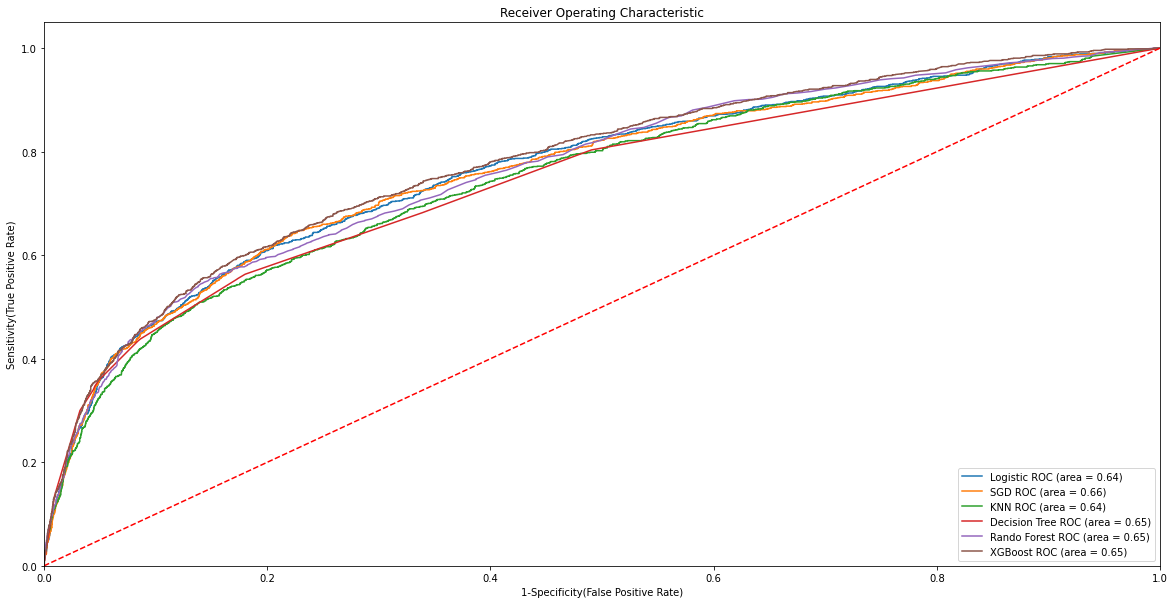

In [ ]:
# from sklearn import metrics

# # false positive rate,fpr= FP/(TN+FP) OR fpr=1-specificty, tpr=sensitivity 
# y_pred_log_p =grid_search_log.predict_proba(X_test)[:,1]
# y_pred_sgd_p =grid_search_sgd.predict_proba(X_test)[:,1]
# #y_pred_scv_p =grid_search_1.predict_proba(X_test)[:,1]
# y_pred_knn_p =grid_search.predict_proba(X_test)[:,1]
# y_pred_dt_p =grid_search_dt.predict_proba(X_test)[:,1]
# y_pred_rf_p =grid_search_rf.predict_proba(X_test)[:,1]
# y_pred_xgb_p =grid_search_xgb.predict_proba(X_test)[:,1]

# model = [grid_search_log,grid_search_sgd,grid_search,grid_search_dt,grid_search_rf,grid_search_xgb]

# models=[y_pred_log_p,y_pred_sgd_p,y_pred_knn_p,y_pred_dt_p,y_pred_rf_p,y_pred_xgb_p]
# label=['Logistic','SGD','KNN','Decision Tree','Rando Forest','XGBoost']

# # plotting ROC curves
# plt.figure(figsize=(20, 10))
# m=np.arange(6)
# for m in m:
#     fpr, tpr,thresholds= metrics.roc_curve(y_test,models[m])
#     auc = metrics.roc_auc_score(y_test,model[m].predict(X_test))
#     plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (label[m], auc))
# plt.plot([0, 1], [0, 1],'r--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('1-Specificity(False Positive Rate)')
# plt.ylabel('Sensitivity(True Positive Rate)')
# plt.title('Receiver Operating Characteristic')
# plt.legend(loc="lower right")
# plt.show()

###**For Model Evaluation we are referreing Confusion Matrix**
After we train a logistic regression model on some training data, we will evaluate the performance of the model on some test data. For this, we use the Confusion Matrix

the accuracy of the model : - ( TP + TN ) / Total

Here, TP stands for True Positive which are the cases in which we predicted yes and the actual value was true. TN stands for True Negative which are the cases in which we predicted no and the actual value was false.FP stands for False Positive which are the cases which we predicted yes and the actual value was False.FN stands for False Negative which are the cases which we predicted No and the actual value was true.

##**Conclusion**

1)Using a **Logistic Regression classifier**, we can predict with 81.4% accuracy, whether a customer is likely to default next month.

2)Using a **Stochastic Gradient Descent classifier**, we can predict with 81.9% accuracy, whether a customer is likely to default next month.

3)Using a **Support Vector Machine classifier**, we can predict with 80.81% accuracy, whether a customer is likely to default next month.

4)Using a **K-Nearest Neighbour classifier**, we can predict with 81.1% accuracy, whether a customer is likely to default next month.

5)Using a **Decision Tree classifier**, we can predict with 81.83% accuracy, whether a customer is likely to default next month.

6)Using a **Random Forest classifier**, we can predict with 81.4% accuracy, whether a customer is likely to default next month.

7)Using a **XGBOOST classifier**, we can predict with 82.16% accuracy, whether a customer is likely to default next month.

The strongest predictors of default are the **PAY_X (ie the repayment status in previous months), the LIMIT_BAL & the PAY_AMTX (amount paid in previous months)**.

We found that using **Stochastic Gradient Descent** and **Decision Tree** are better.

**Demographics**: we see that being Female, More educated, Single and between 30-40years old means a customer is more likely to make payments on time.

After exploring, manipulating and experimenting with different models on the credit card default data set we have obtained a maximum accuracy of 0.82 or 82% to determine whether a person defaults on their credit card or not. Ideally we would have been able to increase this accuracy by trying out various ways of preprocessing the data, utilizing dimensionality reduction, fine-tuning the models' hyperparameters, and applying ensemble learning.

First we derived new features from the data set. Since this resulted in about 100 features we explored dimensionality reduction. Using the second form of reduction, LLE, we ran our initial classification models, Logistic Regression and Support Vector Classifier with original training set and the reduced set. Seeing no improvement with the set produced in LLE we continued using our original training set.

Next we fine-tuned the better performing model, Logisitic Regression, with GridSearchCV as another attempt to improve the model. After using GridSearchCV no significant improvements were seen.

This led us to trying ensemble learning to see if our overall accuracy could be improved by combining various models' predictions. Once again there did not seem to be a significant improvement in both the Bagging Classifier and Voting Classifier when compared to our Logisitic Regression model.

In the end, looking at the accuracy scores of each model was not enough information to choose which model performed best when trying to predict whether or not a person would default on their credit card. Above one can clearly see how close all these accuracy scores fall. In fact, by just seeing the accuracy scores the Voting Classifier seems to perform the best. But if looks at performance via ROC curves the Logistic Regression model seems to perform the best and the Voting Classifier does significantly worse.

For future work, we think it would be interesting to develop more complex models, such as implementing a neural network and seeing if there could be a better performance of an 82% accuracy score since all our previous techniques did not seem to effect the accuracy.